In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [89]:
df=pd.read_csv("train_u6lujuX_CVtuZ9i (1).csv")

In [90]:
type(df)

pandas.core.frame.DataFrame

In [91]:
df.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
39,LP001116,Male,No,0,Not Graduate,No,3748,1668.0,110.0,360.0,1.0,Semiurban,Y
187,LP001643,Male,Yes,0,Graduate,No,2383,2138.0,58.0,360.0,NaN,Rural,Y
277,LP001904,Male,Yes,0,Graduate,No,3103,1300.0,80.0,360.0,1.0,Urban,Y
381,LP002229,Male,No,0,Graduate,No,5941,4232.0,296.0,360.0,1.0,Semiurban,Y
72,LP001248,Male,No,0,Graduate,No,3500,0.0,81.0,300.0,1.0,Semiurban,Y


In [92]:
df.shape

(614, 13)

In [93]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [94]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [95]:
df=df.fillna(df.mode().iloc[0])

In [96]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [97]:
# label encoding
df.replace({"Loan_Status":{"N":0,"Y":1}},inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_8516\264496963.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Loan_Status":{"N":0,"Y":1}},inplace=True)


In [98]:
df['Dependents'].value_counts()

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

In [99]:
df['Dependents'].replace('3+',4,inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_8516\1453846192.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dependents'].replace('3+',4,inplace=True)


In [100]:
df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
352,LP002141,Male,Yes,4,Graduate,No,2666,2083.0,95.0,360.0,1.0,Rural,1
188,LP001644,Male,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,1
460,LP002478,Male,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,1.0,Semiurban,1
340,LP002115,Male,Yes,4,Not Graduate,No,2647,1587.0,173.0,360.0,1.0,Rural,0
134,LP001487,Male,No,0,Graduate,No,4895,0.0,102.0,360.0,1.0,Semiurban,1
103,LP001356,Male,Yes,0,Graduate,No,4652,3583.0,120.0,360.0,1.0,Semiurban,1
500,LP002603,Female,No,0,Graduate,No,645,3683.0,113.0,480.0,1.0,Rural,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
392,LP002263,Male,Yes,0,Graduate,No,2583,2115.0,120.0,360.0,1.0,Urban,1
414,LP002335,Female,Yes,0,Not Graduate,No,2149,3237.0,178.0,360.0,0.0,Semiurban,0


<Axes: xlabel='Education', ylabel='count'>

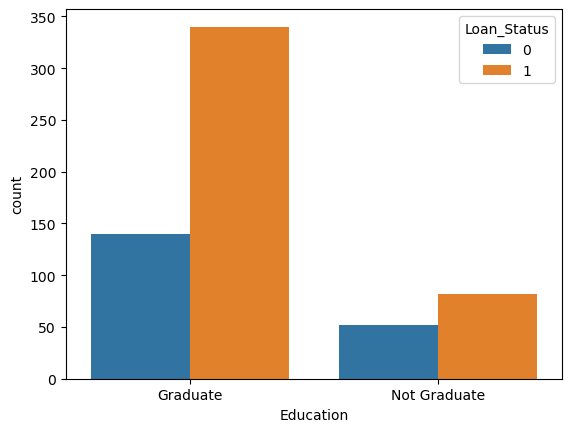

In [101]:
# education & loan_status
sns.countplot(x='Education',hue='Loan_Status',data=df)

<Axes: xlabel='Married', ylabel='count'>

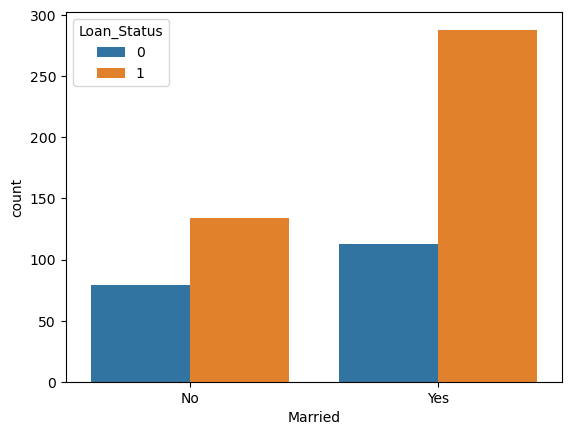

In [102]:
# martial status & loan_status
sns.countplot(x='Married',hue='Loan_Status',data=df)

In [103]:
# convert categorical columns to numerical values
df.replace({
    'Married': {'No': 0, 'Yes': 1},
    'Gender': {'Male': 1, 'Female': 0},
    'Self_Employed': {'No': 0, 'Yes': 1},
    'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2},
    'Education': {'Graduate': 1, 'Not Graduate': 0}
}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_8516\2265433252.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({


In [104]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,120.0,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1
6,LP001013,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,2,1
7,LP001014,1,1,4,1,0,3036,2504.0,158.0,360.0,0.0,1,0
8,LP001018,1,1,2,1,0,4006,1526.0,168.0,360.0,1.0,2,1
9,LP001020,1,1,1,1,0,12841,10968.0,349.0,360.0,1.0,1,0


In [105]:
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [106]:
df['Dependents'].astype(int)

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    4
611    1
612    2
613    0
Name: Dependents, Length: 614, dtype: int64

In [109]:
X=df.drop(columns=['Loan_ID','Loan_Status'])
y=df['Loan_Status']


In [110]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [111]:
# train the svm model

In [112]:
classifier=svm.SVC(kernel='linear')
classifier.fit(X_train,y_train)

SVC(kernel='linear')

***model evaluation***

In [113]:
y_pred=classifier.predict(X_test)
accuracy_score(y_pred,y_test)

0.7967479674796748

In [118]:
new_df=[1,1,1,1,0,12841,10968,349,360,1,1]
new_df=np.asarray(new_df)
new_df=new_df.reshape(1,-1)
prediction=classifier.predict(new_df)
print(prediction)

[1]


c:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
